##  Hessian Filter Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@50987afc

This `Op` calculates the values of the [Hessian Matrix](https://en.wikipedia.org/wiki/Hessian_matrix) at each pixel of a given input image. Let's see how this `Op` is called:

In [2]:
ij.op().help("hessian")

Available operations:
	(CompositeIntervalView out) =
	net.imagej.ops.filter.hessian.HessianRAI(
		RandomAccessibleInterval in)

Note that the `Op` outputs a [`CompositeIntervalView`](http://javadoc.scijava.org/ImgLib2/net/imglib2/view/composite/CompositeIntervalView.html), a type of `RandomAccessibleInterval` that contains a [`Composite`](http://javadoc.scijava.org/ImgLib2/net/imglib2/view/composite/Composite.html) at each pixel. This `Composite` contains a different hessian value at each of its indices. We will show how to get these values later on. Let's start with an image and convert it to `FloatType` since we are dealing with derivatives...

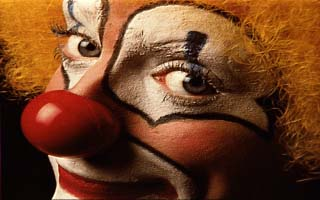

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")
converted = ij.op().run("convert.float32", input)

ij.notebook().display(converted)

Let's say that we want to find the first value of the hessian matrix (the second partial derivative with respect to the first dimension of the image) at each pixel and to create an image from those values. We can use `hessian` to do that. Let's do the hessian and create our image in which we will store the values:

In [4]:
import net.imglib2.FinalInterval
import net.imglib2.type.numeric.real.FloatType

hessian = ij.op().run("hessian", converted)

dims = FinalInterval.createMinSize(0, 0, input.dimension(0), input.dimension(1))
hessianSlice = ij.op().run("create.img", dims, new FloatType())

ArrayImg [320x200]

Now that we have the calculations completed, all we have to do is to iterate over the `hessian` output, grab the first value out of each `Composite`, and store it in the right place within the created image:

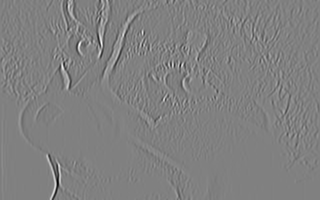

In [5]:
sliceCursor = hessianSlice.cursor()
hessianRA = hessian.randomAccess()

while(sliceCursor.hasNext()){
    sliceCursor.next()
    hessianRA.setPosition(sliceCursor.getLongPosition(0), 0)
    hessianRA.setPosition(sliceCursor.getLongPosition(1), 1)
    sliceCursor.get().set(hessianRA.get().get(0))
}

ij.notebook().display(hessianSlice)